<a href="https://colab.research.google.com/github/fahmiajik12/Python/blob/Master/data_preprosesJbr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [28]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Load Data From Local File
data=pd.read_csv('data.csv')

Data Understanding

In [30]:
#See the first five data 
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_banjir,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,KEJADIAN,2012
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,20,KEJADIAN,2012
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,1,KEJADIAN,2012
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,17,KEJADIAN,2012
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,7,KEJADIAN,2012


In [31]:
# see the number of row and number of columns of data
data.shape

(270, 8)

In [32]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   270 non-null    int64 
 1   kode_provinsi        270 non-null    int64 
 2   nama_provinsi        270 non-null    object
 3   kode_kabupaten_kota  270 non-null    int64 
 4   nama_kabupaten_kota  270 non-null    object
 5   jumlah_banjir        270 non-null    int64 
 6   satuan               270 non-null    object
 7   tahun                270 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 17.0+ KB


In [33]:
#see a statistical summary of variables with numeric types
data.describe()

,id,kode_provinsi,kode_kabupaten_kota,jumlah_banjir,tahun
count,270.000000,270.0,270.000000,270.000000,270.000000
mean,135.500000,32.0,3231.333333,7.237037,2016.500000
std,78.086491,0.0,31.259794,10.113635,2.877615
min,1.000000,32.0,3201.000000,0.000000,2012.000000
25%,68.250000,32.0,3207.000000,1.000000,2014.000000
50%,135.500000,32.0,3214.000000,4.000000,2016.500000
75%,202.750000,32.0,3273.000000,9.750000,2019.000000
max,270.000000,32.0,3279.000000,75.000000,2021.000000


Data Cleaning and Preprocessing

Check Dulpicate Data

In [34]:
#Drop duplicate value
data=data.drop_duplicates()

In [35]:
#see changes in the number of rows and columns after the duplicate drop
data.shape

(270, 8)

Check Data Types

In [36]:
#Check data type
data.dtypes

id                      int64
kode_provinsi           int64
nama_provinsi          object
kode_kabupaten_kota     int64
nama_kabupaten_kota    object
jumlah_banjir           int64
satuan                 object
tahun                   int64
dtype: object

In [37]:
#Check the missing value
data.isnull().sum()

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jumlah_banjir          0
satuan                 0
tahun                  0
dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

Id_col = ['id']
num_cols = ['jumlah_banjir','satuan']

bin_cols = ['nama_kabupaten_kota','nama_provinsi','satuan']

le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])

#data=pd.get_dummies(data=data,columns = multi_cols,drop_first=True)

In [39]:
data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_banjir,satuan,tahun
0,1,32,0,3201,3,0,0,2012
1,2,32,0,3202,15,20,0,2012
2,3,32,0,3203,5,1,0,2012
3,4,32,0,3204,0,17,0,2012
4,5,32,0,3205,7,7,0,2012
...,...,...,...,...,...,...,...,...
265,266,32,0,3275,20,14,0,2021
266,267,32,0,3276,24,3,0,2021
267,268,32,0,3277,22,6,0,2021
268,269,32,0,3278,26,2,0,2021


In [54]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.20,random_state=111)

train_X = train.drop(labels='nama_kabupaten_kota',axis=1)
train_Y = train['nama_kabupaten_kota']
test_X  = test.drop(labels='nama_kabupaten_kota',axis=1)
test_Y  = test['nama_kabupaten_kota']

In [55]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote methode
os = SMOTE(sampling_strategy='minority', random_state = 123,k_neighbors=5)
train_smote_X, train_smote_Y = os.fit_resample(train_X, train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X, columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [42]:
train_Y.value_counts()

22    10
4     10
3      9
9      9
11     9
25     9
2      9
7      8
13     8
23     8
0      8
17     8
1      8
18     8
24     8
16     8
19     8
14     8
26     8
6      7
15     7
21     7
12     7
20     7
8      7
10     7
5      6
Name: nama_kabupaten_kota, dtype: int64

In [56]:
train_smote_Y.value_counts()

nama_kabupaten_kota
4                      10
5                      10
22                     10
2                       9
3                       9
25                      9
9                       9
11                      9
0                       8
16                      8
24                      8
23                      8
19                      8
18                      8
17                      8
13                      8
14                      8
1                       8
7                       8
26                      8
15                      7
12                      7
20                      7
21                      7
10                      7
8                       7
6                       7
dtype: int64

**SVM**

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [58]:
from sklearn.svm import SVC

model_SVM = SVC(random_state=0)
model_SVM.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [59]:
y_pred_svm = model_SVM.predict(test_X)

In [60]:
print(classification_report(test_Y, y_pred_svm))

score = accuracy_score(test_Y, y_pred_svm)
print("Accuracy: %.2f%%" % (score*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.11      0.50      0.18         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Random Forest**

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(train_smote_X, train_smote_Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(random_state=0)

In [62]:
y_pred = model.predict(test_X)

In [63]:
print(classification_report(test_Y, y_pred))

score = accuracy_score(test_Y, y_pred)
print("Accuracy: %.2f%%" % (score*100))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.75      0.75      0.75         4
           6       0.00      0.00      0.00         3
           7       1.00      0.50      0.67         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.33      0.33      0.33         3
          11       0.20      1.00      0.33         1
          12       0.00      0.00      0.00         3
          13       0.50      0.50      0.50         2
          14       0.00      0.00      0.00         2
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [64]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10)
clf = RandomForestClassifier()
score_rf_val = cross_val_score(clf,train_smote_X, train_smote_Y,cv=cv)
score_rf_val

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

array([0.09090909, 0.13636364, 0.45454545, 0.36363636, 0.18181818,
       0.22727273, 0.27272727, 0.27272727, 0.31818182, 0.27272727])

In [65]:
score_rf_val.mean()
print("Accuracy Validation Score: %.2f%%" % (score_rf_val.mean()*100))

Accuracy Validation Score: 25.91%


In [66]:
confusion_matrix(test_Y, y_pred)

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

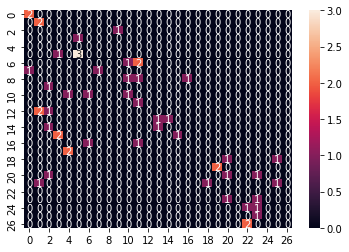

In [67]:
import seaborn as sn
cm = confusion_matrix(test_Y, y_pred)
sn.heatmap(cm, annot=True)